<a href="https://colab.research.google.com/github/noobylub/final_coursework/blob/main/coursework_data_import.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Experiment**
<br>
This research seeks to compare One-Hot-Encoding against Multi-Layer Perceptron, which has be de-facto for many ML problems. 
<br>
The following experiement will be performed and evaluated: 

*   One hot encoding (OHE), sigmoid
*   Multi Layer Perceptron (MLP), sigmoid
*   OHE, softmax  
*   MLP, softmax



**Retrieving the Data and Data Analysis**

In [ ]:
!wget https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/coursework/Compiled_Reviews.txt

In [1]:
# Run this when editing in code editor 
!curl -O https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/coursework/Compiled_Reviews.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21.2M  100 21.2M    0     0  21.5M      0 --:--:-- --:--:-- --:--:-- 21.5M


In [109]:
# Example of what the data looks like
!head -n5 Compiled_Reviews.txt

REVIEW	RATING	PRODUCT_TYPE	HELPFUL
"This is a wonderful album, that evokes memories of the 60's folk boom, yet contains original songs. I was amazed at the fantastic harmonies and musical arrangements.Anyone who loves the movie ""A Mighty Wind"" and who loves folk music will fall in love with this album. I know I did"	positive	music	neutral
"On one hand, this CD is a straight ahead instrumental rocker, but Johnny A really shows how great he is with ballads, such as his covers of ""Wichita Lineman,"" and ""Yes it Is.""  In fact, those two ballads alone are worth the price of the CD by themselves.But Johnny A can flat kick your ass, too.  He's a biker and his tunes like Oh Yeah, In the Wind and Two Wheel Horse are named for his other hobby.  And they rock, but there's nothing cliched or tired in his style.  He always seems to be looking for new ways to say something.I saw him in person at the Triple Door in Seattle sometime in February 2005 in a power trio format and he played most of th

**Data loading and pre-processing**
<br>
Below we preprocess the data from the raw file "Compiled_reviews.txt"
<br>
We remove any unwanted characters, to improve the integrity of the text corpus. 

In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt

reviews=[]
sentiment_ratings=[]
product_types=[]
helpfulness_ratings=[]

with open("Compiled_Reviews.txt") as f:
   for line in f.readlines()[1:]:
        fields = line.rstrip().split('\t')
        # remove punctuation/numbers and replace it with a space
        fields[0] = re.sub(r'[.,!?;:()\[\]{}\-—\'\/\"\"\d+]', " ",fields[0])
        reviews.append(fields[0])
        sentiment_ratings.append(fields[1])
        
        helpfulness_ratings.append(fields[3])


**Data Analysis**
<br/>
Below we see what the data looks like after pre-processing
<br/>
Data analysis can also be shown below

In [ ]:
index = 0
import re
from collections import Counter

# Positive review
for index in range(len(reviews)):
  print("Review is ",reviews[index])
  print("Sentiment ", sentiment_ratings[index])
  print("Helpfullness is ", helpfulness_ratings[index])
  print("-----------")
  if(index >5):
    break;
# helpfulness_ratings[0:5]

  

Review is   This is a wonderful album  that evokes memories of the    s folk boom  yet contains original songs  I was amazed at the fantastic harmonies and musical arrangements Anyone who loves the movie   A Mighty Wind   and who loves folk music will fall in love with this album  I know I did 
Sentiment  positive
Helpfullness is  neutral
-----------
Review is   On one hand  this CD is a straight ahead instrumental rocker  but Johnny A really shows how great he is with ballads  such as his covers of   Wichita Lineman    and   Yes it Is     In fact  those two ballads alone are worth the price of the CD by themselves But Johnny A can flat kick your ass  too   He s a biker and his tunes like Oh Yeah  In the Wind and Two Wheel Horse are named for his other hobby   And they rock  but there s nothing cliched or tired in his style   He always seems to be looking for new ways to say something I saw him in person at the Triple Door in Seattle sometime in February      in a power trio format and

In [111]:
total_printed = 0
for index in range(len(reviews)):
  if(sentiment_ratings[index] == 'negative'):
    print("Review is ",reviews[index])
    print("Sentiment ", sentiment_ratings[index])
    print("Helpfullness is ", helpfulness_ratings[index])
    print("-----------")
    total_printed += 1
  if(total_printed > 5):
    break;

Review is   I ve always held the philosophy you are what you re entertained by  So  those who like Ludacris are definitely telling on themselves about their views of life and women  And speaking of women   Ludacris never met one who wasn t a h o Ludacris is the epitome of the sexual hypocrisy that plagues men  you demean and look down on women for being h oes  yet you hope every woman is a h o so you ll have no problems getting laid  But then  you re so disgusted with the fact the woman behaves too much like you  so you go and find a   nice girl   because you can respect her and marry her and procreate with her  But then you cheat on her with a   bad girl   because h oes need h oes  but then you can t respect the   bad girl   because she s a slut  so you go back to the   good girl    But she s not nasty enough for you  so then   around and around we go  Women are basically being punished for men not being able to make up their minds about what the heck they want from us He s OBSESSED w

Sentiment distribution:
positive: 20972 (57.38%)
negative: 15576 (42.62%)


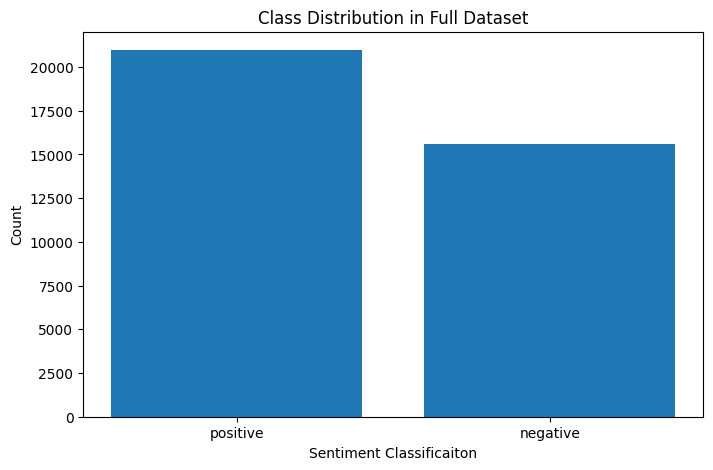

In [112]:
sentiment_distribution = Counter(sentiment_ratings)
total_data = len(sentiment_ratings)

print("Sentiment distribution:")
for sentiment, count in sentiment_distribution.items():
    percentage = (count / total_data) * 100
    print(f"{sentiment}: {count} ({percentage:.2f}%)")


plt.figure(figsize=(8, 5))
plt.bar(sentiment_distribution.keys(), sentiment_distribution.values())
plt.xlabel('Sentiment Classificaiton')
plt.ylabel('Count')
plt.title('Class Distribution in Full Dataset')
plt.show()

**Tokenising Corpus Dataset**
<br/>
Tokenising the words all the words in the reviews database. This will then be used to create the list of features, which would be the columns

In [5]:

# Tokenising it by spaces
tokenised_set = []
for review in reviews:
  # Basically, re.split(' ') results in an array of words split by spaces
  # Then iterate through that array of words and append it individually to tokenised_set
  [tokenised_set.append(tokens) for tokens in re.split(' ', review)]

counts = Counter(tokenised_set)
so_with_content=sorted(counts.items(), key=lambda item: item[1], reverse=True)
so_with_content=list(zip(*so_with_content))[0]


In [6]:
# We want to focus on content words
function_words = []
with open("function_words.txt") as f:
    function_words = f.read().splitlines()
so: list[str] = []
for word in so_with_content:
    if word not in function_words and len(word) > 2:
        so.append(word)

**Creating the sparse embedding**
<br/>
This is a simple sparse embedding of filtered content words of corpus. This will be used as the main features for all classification model. 

**Ensuring Reproducibility**
<br/>
To ensure reproducibility, we will set the random seed to 42.

In [7]:
import numpy as np
import random 
np.random.seed(42)
random.seed(42)

# 8000 Features
word_list = so[0:8000]
M = np.zeros((len(reviews), len(word_list)))
#iterate over the reviews
for i, rev in enumerate(reviews):
  # Ensure we are looking at word
  rev = rev.split(' ')
  for(j,word) in enumerate(word_list):
    if word in rev:
      M[i,j]=1

In [8]:
# 36548 examples, with 8000 features (words occurence)
M.shape

(36548, 8000)

**Data Split**

In [9]:
train_ints = np.random.choice(len(reviews), int(len(reviews)*0.6), replace=False)
test_train_ints = list(set(range(0, len(reviews))) - set(train_ints))
test_ints = np.random.choice(test_train_ints, int(len(test_train_ints)*0.5), replace=False)
final_test_ints = list(set(test_train_ints) - set(test_ints))

In [10]:
print("Training test", len(train_ints))
print("Validation test", len(test_ints))
print("Final test", len(final_test_ints))
print("Total", len(train_ints)+len(test_ints)+len(final_test_ints))

Training test 21928
Validation test 7310
Final test 7310
Total 36548


**Classifiers for Sentiment Analysis**
<br>
Multiple classifiers will be run, and tested againts each other for sentiment analysis classifier.





Experiment for 8000 features, meaning 8000 words
<br>
Below we divide the data into train, validation and test sets

In [11]:
# Divide the features by the training indices
# Select all rows that are in the indices of the respective lists and select all the rows
M_train = M[train_ints,]
M_test = M[test_ints,]
M_final_test = M[final_test_ints,]
sentiment_labels = [sentiment_ratings[i] for i in train_ints]
sentiment_labels_test = [sentiment_ratings[i] for i in test_ints]
sentiment_labels_final_test = [sentiment_ratings[i] for i in final_test_ints]

In [12]:
# Class Distribution Test to check
class_distribution = Counter(sentiment_ratings)
class_distribution_test = Counter(sentiment_labels_test)
class_distribution_final_test = Counter(sentiment_labels_final_test)
class_distribution_train = Counter(sentiment_labels)

print(class_distribution)
print(class_distribution_test)
print(class_distribution_final_test)
print(class_distribution_train)


Counter({'positive': 20972, 'negative': 15576})
Counter({'positive': 4190, 'negative': 3120})
Counter({'positive': 4228, 'negative': 3082})
Counter({'positive': 12554, 'negative': 9374})


In [13]:
print(M_train.shape)
print(M_test.shape)
print(M_final_test.shape)
# Sentiment Labels are ordered list
print(len(sentiment_labels))
print(len(sentiment_labels_test))
print(len(sentiment_labels_final_test))


(21928, 8000)
(7310, 8000)
(7310, 8000)
21928
7310
7310


**Function for Classifiers**
<br/>
This function will be called multiple times to test out different hyperparameters and their effects. 
<br/>
In each training, the function will perform a test on the sentiment_labels_test after finishing training on sentiment_labels_train.
<br/>
The best performing models will be tested further with the last 20 percent to test whether they generalise well or not.

In [127]:
# Function to run Logistic Regression with Sigmoid
def logistic_regresssion_sigmoid(x_dataset,y_dataset,x_test,y_test,num_features,n_iters=1000,lr=0.4,random_seed=42):
    np.random.seed(random_seed)
    weights = np.random.rand(num_features)
    bias=np.random.rand(1)
    logistic_loss=[]
    num_samples=len(y_dataset)
    for i in range(n_iters):
        # Basically you are multiplying all the values of M_train with the weights
        # It would be similar to this: z= bias + (x[0]*weights[0] + x[1]*weights[1])
        # The values here would be 21928, 5000 and 5000, 1, leading to a matrix of 21928, 1
        z= x_dataset.dot(weights) + bias
        # print(z)
        # (1 / (1+np.exp(-z))) we use sigmoid because we only need to know whether it is positive or negative, two possible values
        q = (1 / (1+np.exp(-z)))
        # print(q)
        eps=0.00001
        # Binary Cross Entropy Loss
        loss = -np.sum((y_dataset*np.log2(q+eps)+(np.ones(len(y_dataset))-y_dataset)*np.log2(np.ones(len(y_dataset))-q+eps)))/num_samples
        
        
        logistic_loss.append(loss)
        # print(logistic_loss)
        # We then make the prediction, if it is below a certain number, 0.5 it is negative and vice versa
        y_pred=[int(ql > 0.5) for ql in q]

        # For logistic regression one shot encoder= dw1 = np.dot(x[0],q-y)/num_samples
        # dw1 = np.do(x[0], q-y)/num_samples

        dw = (q-y_dataset).dot(x_dataset)/num_samples
        db = np.sum(q-y_dataset)/num_samples
        weights = weights - dw*lr
        bias = bias - db*lr

    
    # Model test on validation dataset 
    result = LogReg_Sigmoid_Test(weights,bias,x_test,y_test)
    return weights,bias, result, logistic_loss

In [128]:
# Code to invoke the function and test results 
# For this specific function, we expect the labels to be already in string format
def LogReg_Sigmoid_Test(weights,bias,test_dataset,y_test:list):
    # Perform Forward Propagation
    z= test_dataset.dot(weights) + bias
    q = (1 / (1+np.exp(-z)))
    x_test_pred=[int(ql > 0.5) for ql in q]
    
    

    # # Accuracy
    # y_final_test = [int(l=='positive') for l in sentiment_labels_final_test]
    # acc_test = [int(yp == y_final_test[s]) for s,yp in enumerate(y_test_pred)]
    # print("Final Test Accuracy: ", sum(acc_test)/len(acc_test))
    # y_test_compare = ["positive" if s == 1 else "negative" for s in y_test ]
    x_labels=["positive" if s == 1 else "negative" for s in x_test_pred]
    
    # TP
    true_positives=sum([int(yt == "positive" and x_labels[s] == "positive") for s,yt in enumerate(y_test)])

    true_negatives=sum([int(yt == "negative" and x_labels[s] == "negative") for s,yt in enumerate(y_test)])
    
    false_positives = sum([int(yt == "negative" and x_labels[s] == "positive") for s,yt in enumerate(y_test)])
    # FN: actual is POSITIVE, predicted is NEGATIVE  
    false_negatives = sum([int(yt == "positive" and x_labels[s] == "negative") for s,yt in enumerate(y_test)])
    
    
    # print("True Positives: ", true_positives)
    # print("False Positives: ", false_positives)
    # print("False Negatives: ", false_negatives)
    # print("True Negatives: ", true_negatives)
    # Precision
    accuracy = (true_positives+true_negatives)/(true_positives+true_negatives+false_positives+false_negatives)
    precision = true_positives/(true_positives+false_positives)
    recall = true_positives/(true_positives+false_negatives)
    f1 = 2*precision*recall/(precision+recall)
    print("--------------")
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1: ", f1)
    print("accuracy: ", accuracy)
    return precision, recall, f1, accuracy

**Different Features forLogistic Regression with Logistic Regression and MLP**
<br/>
- 8000 features 
- Learning Rate 
    - 0.4
    - 0.2
    - 0.1
    - 0.05
    <br/>
- This will all be done by running multiple classifiers and storing the results in a dictionary

In [129]:
# List of hyperparameters to be used for training the model
learning_rates = [0.4,0.2,0.1,0.05]

In [130]:

# invoking the function
y=[int(l == "positive") for l in sentiment_labels]
LogReg_models_sigmoid = {}
for lr in learning_rates:
    print("Learning rate: ",lr)
    weights,bias,result,logistic_loss = logistic_regresssion_sigmoid(M_train,y,M_test,sentiment_labels_test,lr=lr,num_features=8000)
    print("-----")
    LogReg_models_sigmoid[lr] = (weights,bias,result,logistic_loss)
    


Learning rate:  0.4


KeyboardInterrupt: 

**Multi-Layer Perceptron**

In [123]:
def MLP_sigmoid(x_dataset,y_dataset,x_test,y_test,num_features,n_iters=1000,lr=0.4,random_seed=42):
    np.random.seed(random_seed)
    
    num_features= x_dataset.shape[1]
    hidden_size = 32

    
    
    # Weight initialization with He/Xavier weight initialization technique to encourage ReLU activation
    # Np.random will not work
    limit_1 = np.sqrt(6 / (num_features ))
    weights_0_1 = np.random.uniform(-limit_1, limit_1, (num_features, hidden_size))
    limit_2 = np.sqrt(6 / (hidden_size ))
    weights_1_2 = np.random.uniform(-limit_2, limit_2, (hidden_size,1))


    loss_history = []
    
    N = x_dataset.shape[0] # Number of training samples

    for iteration in range(n_iters):

        layer_2_error = 0
        layer_0 = x_dataset

        ## Add forward pass
        layer_1 = np.maximum(np.dot(layer_0,weights_0_1),0)
        layer_2 = np.dot(layer_1,weights_1_2)
    


        # Then apply sigmoid
        layer_2_s = 1/(1+np.exp(-layer_2))

    
        eps = 1e-8
        q = np.clip(layer_2_s, eps, 1 - eps)
        # BCE Cross Entropy Loss with clipping
        loss = (-np.sum(y_dataset * np.log2(q) + (1 - y_dataset) * np.log2(1 - q)))/N
        
        loss_history.append(loss)
        print(loss)

        ## Add backward pass and update weights
        layer_2_diff = (layer_2_s - y_dataset)

        z1 = np.dot(layer_0, weights_0_1)
        relu_grad = (z1 > 0).astype(float)



        hidden_delta = np.dot(layer_2_diff, weights_1_2.T) * relu_grad

        # Normalize weight updates by N
        weights_1_2 -= lr * (np.dot(layer_1.T, layer_2_diff) / N)
        weights_0_1 -= lr * (np.dot(layer_0.T, hidden_delta) / N)

    result = test_models_MLP_Sigmoid(weights_0_1,weights_1_2,x_test,y_test)
    return weights_0_1,weights_1_2,result, loss_history

In [1]:
# Code to invoke the function and test results 
# For this specific function, we expect the labels to be already in string format
def test_models_MLP_Sigmoid(weights_MLP_1,weights_MLP_2,x_dataset,y_test:list):
    # Forward propagation
    layer_0_final_test = x_dataset
    layer_1_final_test = np.maximum(np.dot(layer_0_final_test, weights_MLP_1), 0)
    layer_2_final_test = np.dot(layer_1_final_test, weights_MLP_2)
    layer_2_s_final_test = 1 / (1 + np.exp(-layer_2_final_test))

    #Converting probabilities
    x_pred = (layer_2_s_final_test > 0.5).astype(int)

    

    # # Accuracy
    x_labels=["positive" if s == 1 else "negative" for s in x_pred]
    
    # TP
    true_positives=np.sum([int(yt == "positive" and x_labels[s] == "positive") for s,yt in enumerate(y_test)])

    true_negatives=np.sum([int(yt == "negative" and x_labels[s] == "negative") for s,yt in enumerate(y_test)])
    
    false_positives = np.sum([int(yt == "negative" and x_labels[s] == "positive") for s,yt in enumerate(y_test)])
    
    # FN: actual is POSITIVE, predicted is NEGATIVE  
    false_negatives = np.sum([int(yt == "positive" and x_labels[s] == "negative") for s,yt in enumerate(y_test)])
    
    
    
    # Precision
    accuracy = (true_positives+true_negatives)/(true_positives+true_negatives+false_positives+false_negatives)
    precision = true_positives/(true_positives+false_positives)
    recall = true_positives/(true_positives+false_negatives)
    f1 = 2*precision*recall/(precision+recall)
    print("----------")
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1: ", f1)
    print("accuracy: ", accuracy)
    return precision, recall, f1, accuracy


In [ ]:
np.random.seed(42)
true_labels = np.array([int(l=='positive') for l in sentiment_labels]).reshape(-1,1)
# invoking the function
MLP_models_sigmoid = {}
for lr in learning_rates:
    print("*******")
    print("Learning rate: ",lr)
    weights,bias,result,logistic_loss = MLP_sigmoid(M_train,true_labels,M_test,sentiment_labels_test,lr=lr,num_features=8000)
    print("-----")
    MLP_models_sigmoid[lr] = (weights,bias,result,logistic_loss)
    


*******
Learning rate:  0.4


KeyboardInterrupt: 

**Further Analysis on Result**
<br/>
Below we gather the best perfoming models and perform further analysis on the result, comparing the two models, MLP and Logistic Regression. 

In [88]:
import builtins
sum = builtins.sum

In [126]:
# Training and gathering the best performing models
LogReg_models_sigmoid = {}
LogReg_models_softmax = {}
MLP_models_sigmoid = {}
MLP_models_softmax = {}

# 0.4 as a learning rate seems to result in best perfomance for MLP and Logistic Regression binary classification
learning_rates = [0.4]
y=[int(l == "positive") for l in sentiment_labels]
for lr in learning_rates:
    print("Learning rate: ",lr)
    weights,bias,result,logistic_loss = logistic_regresssion_sigmoid(M_train,y,M_test,sentiment_labels_test,lr=lr,num_features=8000)
    print("-----")
    LogReg_models_sigmoid[lr] = (weights,bias,result,logistic_loss)

# learning_rates = [0.4,0.2]
true_labels = np.array([int(l=='positive') for l in sentiment_labels]).reshape(-1,1)
# invoking the function
MLP_models_sigmoid = {}
for lr in learning_rates:
    print("*******")
    print("Learning rate: ",lr)
    weights,bias,result,logistic_loss = MLP_sigmoid(M_train,true_labels,M_test,sentiment_labels_test,lr=lr,num_features=8000)
    print("-----")
    MLP_models_sigmoid[lr] = (weights,bias,result,logistic_loss)

# learning_rates = [0.4]
# LogReg_models_softmax = {}
# for lr in learning_rates:
#     print("Learning rate: ",lr)
#     weights,bias,result,loss = LogisticRegression_Softmax(M_train,y_train,M_test,y_test,lr=lr) 
#     print("-----")
#     LogReg_models_softmax[lr] = (weights,bias,result,loss)

# learning_rates = [0.05]
# MLP_models_softmax = {}
# for lr in learning_rates:
#     print("Learning rate: ",lr)
#     weights,bias,result,loss = MLP_softmax(M_train,y_train,M_test,y_test,lr=lr) 
#     print("-----")
#     MLP_models_softmax[lr] = (weights,bias,result,loss)

Learning rate:  0.4


KeyboardInterrupt: 

In [2]:
# Methods to perform forward propagation to conduct further error slice analysis 
def LogReg_ForwardPass(weights, bias, x_dataset, Sigmoid:bool):
    if(Sigmoid):
        z= x_dataset.dot(weights) + bias
        q = (1 / (1+np.exp(-z)))
        x_test_pred=[int(ql > 0.5) for ql in q]
        return x_test_pred, q
    else:
       z_test = x_dataset.dot(weights) + bias
       # Perform theSoftmax
       exp_z_test = np.exp(z_test)
       q_test = exp_z_test / np.sum(exp_z_test, axis=1, keepdims=True)
       # Get predictions, basically get the class with highest probability
       y_test_pred = np.argmax(q_test, axis=1)  # Shape: (7310,)
       return y_test_pred,q_test

def MLP_ForwardPass(weights_0_1,weights_1_2,x_dataset, Sigmoid:bool):
    if(Sigmoid):
        layer_0_final_test = x_dataset
        layer_1_final_test = np.maximum(np.dot(layer_0_final_test, weights_0_1), 0)
        layer_2_final_test = np.dot(layer_1_final_test, weights_1_2)
        layer_2_s_final_test = 1 / (1 + np.exp(-layer_2_final_test))

        #Converting probabilities
        x_pred = (layer_2_s_final_test > 0.5).astype(int)
        return x_pred, layer_2_s_final_test
    else:
        layer_0_test = x_dataset    
        layer_1_test = np.maximum(np.dot(layer_0_test, weights_0_1), 0)  # ReLU activation
        layer_2_test = np.dot(layer_1_test, weights_1_2)

        # Apply softmax
        exp_z_test = np.exp(layer_2_test)
        layer_2_s_test = exp_z_test / np.sum(exp_z_test, axis=1, keepdims=True)

        # Get predictions (class with highest probability)
        y_pred_test = np.argmax(layer_2_s_test, axis=1)
        return y_pred_test, layer_2_s_test

**Conducting Error Analysis**
<br/>
- What can MLP capture that Logistic Regression cannot or vice versa ?
<br/>
- How do they differ in how they encode features, and do MLP and Logistic Regression Models assign the right weight to the right features ?  


In [125]:
# Error slice analysis
# What can MLP capture that Logistic Regression cannot and vice versa ? 
lr = 0.4
# Get predictions from both models
# Sigmoids
logregSigmoid_preds, logregSigmoid_probs = LogReg_ForwardPass(LogReg_models_sigmoid[lr][0], LogReg_models_sigmoid[lr][1], M_test, Sigmoid=True)
mlpSigmoid_preds, mlpSigmoid_probs = MLP_ForwardPass(MLP_models_sigmoid[lr][0], MLP_models_sigmoid[lr][1], M_test, Sigmoid=True)
# testing MLP Sigmoid 
# result = test_models_MLP_Sigmoid(MLP_models_sigmoid[lr][0], MLP_models_sigmoid[lr][1],M_test,sentiment_labels_test)

# # Softmax
# logregSoftmax_preds, logregSoftmax_probs = LogReg_ForwardPass(LogReg_models_softmax[lr][0], LogReg_models_softmax[lr][1], M_test, Sigmoid=False)
# lr = 0.05
# mlpSoftmax_preds, mlpSoftmax_probs = MLP_ForwardPass(MLP_models_softmax[lr][0], MLP_models_softmax[lr][1], M_test, Sigmoid=False)


# Get true labels for sentiment analysis
true_labels = np.array([int(l == "positive") for l in sentiment_labels_test])

# # Create error slices
mlpSigmoid_correct = (mlpSigmoid_preds.flatten() == true_labels)
logregSigmoid_correct = (np.array(logregSigmoid_preds).flatten() == true_labels)

# print(mlpWins)
# Create error slices 
mlp_wins_sigmoid = [mlpSigmoid_correct[i] and not logregSigmoid_correct[i] for i in range(len(mlpSigmoid_correct))]
logreg_wins_sigmoid = [logregSigmoid_correct[i] and not mlpSigmoid_correct[i] for i in range(len(mlpSigmoid_correct))]
both_correct_sigmoid = [mlpSigmoid_correct[i] and logregSigmoid_correct[i] for i in range(len(mlpSigmoid_correct))]
both_wrong_sigmoid = [not mlpSigmoid_correct[i] and not logregSigmoid_correct[i] for i in range(len(mlpSigmoid_correct))]

# Get indices where MLP wins
mlp_wins_indices = []
for index,value in enumerate(mlp_wins_sigmoid):
    if (value == True):
        mlp_wins_indices.append(index)
# mlp_wins_indices = [i for i in range(len(mlp_wins_sigmoid)) if mlp_wins_sigmoid[i]]

# Get indices where LogReg wins
logreg_wins_indices = []
for index,value in enumerate(logreg_wins_sigmoid):
    if (value == True):
        logreg_wins_indices.append(index)

# Get indices where both correct
both_correct_indices = []
for index,value in enumerate(both_correct_sigmoid):
    if (value == True):
        both_correct_indices.append(index)

# Get indices where both wrong
both_wrong_indices = []
for index,value in enumerate(both_wrong_sigmoid):
    if (value == True):
        both_wrong_indices.append(index)

# print(sum([x == 'True' for x in mlp_wins_indices]))

# Statistics of comparison between the. two models 
print(f"MLP wins : {np.sum(mlp_wins_sigmoid)} ({np.sum(mlp_wins_sigmoid)/len(mlp_wins_sigmoid)*100:.2f}%)")
print(f"LogReg wins : {np.sum(logreg_wins_sigmoid)} ({np.sum(logreg_wins_sigmoid)/len(logreg_wins_sigmoid)*100:.2f}%)")
print(f"Both correct: {np.sum(both_correct_sigmoid)} ({np.sum(both_correct_sigmoid)/len(both_correct_sigmoid)*100:.2f}%)")
print(f"Both wrong: {np.sum(both_wrong_sigmoid)} ({np.sum(both_wrong_sigmoid)/len(both_wrong_sigmoid)*100:.2f}%)")
print(f"Total examples: {len(mlp_wins_sigmoid)}")


# This is where 
for index,idx in enumerate(logreg_wins_indices[:5]):
    print(index)
    # print(test_ints[idx])
    test_example_idx = test_ints[idx]  # Map to original review index
    print(test_example_idx)
    # print(f"\n=== Example {idx} (Review #{test_example_idx}) ===")
    print(f"Review: {reviews[test_example_idx]}")
    print(f"True label: {sentiment_labels_test[idx]}")
    print(f"MLP prediction: {'positive' if mlpSigmoid_preds.flatten()[idx] == 1 else 'negative'}")
    print(f"LogReg prediction: {'positive' if logregSigmoid_preds[idx] == 1 else 'negative'}")
    print(f"MLP confidence: {mlpSigmoid_probs.flatten()[idx]:.3f}")
    print(f"LogReg confidence: {logregSigmoid_probs[idx]:.3f}")
    print("-------")
# Print statistics for error slices


# Print statistics


KeyError: 0.4

Before conducting forward propagation analysis, it is worthwile to look at how MLP and Logistic Regression encode different, or assign weights differently. 

In [91]:
# Get the highest weights amont LogReg Models Sigmoid 
# Simply assign weights to each word, and those words can contribute or not it depends. 
indices = [i for i in (LogReg_models_sigmoid[0.4][0])]
word_weight = []
for i,value in enumerate(LogReg_models_sigmoid[0.4][0]):
    word_weight.append({
            "word": word_list[i], 
            "weight": value
        })
print("Top words contributing to negative sentiment")
word_weight = sorted(word_weight, key=lambda x: x['weight'], reverse=False)
for i in word_weight[:20]:
    print("Word: ",i['word'], i['weight'])
print("--------")
print("Top words contributing to positive sentiment")
for i in word_weight[-20:]:
    print("Word: ",i['word'], i['weight'])

Top words contributing to negative sentiment
Word:  NOT -1.8832349980906231
Word:  disappointed -1.6376199308415602
Word:  bad -1.5465934852573422
Word:  poor -1.5299166117454928
Word:  return -1.504330086446005
Word:  waste -1.4046782804404672
Word:  money -1.338414674961026
Word:  point -1.3167564323697052
Word:  support -1.2498251719647002
Word:  cannot -1.2263769846937227
Word:  worse -1.1892531455051139
Word:  called -1.1858039259878796
Word:  instead -1.169703513712682
Word:  were -1.1647370511073678
Word:  worst -1.1255493771616447
Word:  completely -1.1193322092875388
Word:  However -1.0981647286922598
Word:  There -1.0637467336550144
Word:  Not -1.0404313964266452
Word:  then -1.005815900201774
--------
Top words contributing to positive sentiment
Word:  patio 1.0940184127386048
Word:  wonderful 1.1064772480117975
Word:  nicely 1.11055859551451
Word:  happy 1.1134307232191354
Word:  Thanks 1.1184812884590023
Word:  Highly 1.1476421202141873
Word:  price 1.1571854889166222
Word

**MLP PROPAGATION ANALYSIS**

In [92]:
# Get the highest weights amont MLP SoftMax Models Sigmoid 
# Different neurons focus on different thigns, and their importance is different accordingly. 
info_neurons_unsorted = {}
second_layer_reverse = MLP_models_sigmoid[0.4][1].T
for i in range(32):
    info_neurons_unsorted[i+1] = {
        "words": [word_list[x] for x in np.argsort(MLP_models_sigmoid[0.4][0][:, i])[::-1][0:15]], "weights": second_layer_reverse[:, i],
        "second_layer": second_layer_reverse[:, i]
    }
    # print("layer", i+1)
    # print([word_list[x] for x in np.argsort(MLP_models_sigmoid[0.4][0][:, i])[::-1][0:15]])
    # print(second_layer_reverse[:, i])



In [93]:
# In order from negative to positive 
info_neurons = sorted(info_neurons_unsorted.items(), key=lambda x: x[1]["second_layer"], reverse=False)

for i in range(5):
    print('Layer', info_neurons[i][0])
    print('Words',info_neurons[i][1]['words'])
    print('Second Layer Weights', info_neurons[i][1]['second_layer'])

Layer 1
Words ['terrible', 'boring', 'waste', 'returning', 'disappointing', 'horrible', 'poor', 'worst', 'junk', 'useless', 'refund', 'disappointment', 'awful', 'returned', 'disappointed']
Second Layer Weights [-1.5922594]
Layer 17
Words ['boring', 'terrible', 'worst', 'waste', 'returning', 'useless', 'return', 'poor', 'junk', 'disappointed', 'ridiculous', 'awful', 'worse', 'horrible', 'disappointment']
Second Layer Weights [-1.50782529]
Layer 29
Words ['boring', 'worst', 'terrible', 'waste', 'worthless', 'returning', 'disappointing', 'returned', 'disappointment', 'awful', 'poorly', 'ridiculous', 'unusable', 'falls', 'junk']
Second Layer Weights [-1.47757262]
Layer 10
Words ['waste', 'returning', 'worst', 'terrible', 'useless', 'boring', 'horrible', 'hopes', 'poor', 'disappointed', 'disappointment', 'disappointing', 'dissapointed', 'returned', 'return']
Second Layer Weights [-1.42848866]
Layer 19
Words ['returning', 'boring', 'terrible', 'waste', 'useless', 'worst', 'horrible', 'refund

In [94]:
# In order from negative to positive 
info_neurons = sorted(info_neurons_unsorted.items(), key=lambda x: x[1]["second_layer"], reverse=True)

for i in range(5):
    print('Layer', info_neurons[i][0])
    print('Words',info_neurons[i][1]['words'])
    print('Second Layer Weights', info_neurons[i][1]['second_layer'])

Layer 12
Words ['Excellent', 'Great', 'love', 'delicious', 'amazing', 'Highly', 'awesome', 'satisfied', 'pleased', 'perfect', 'con', 'job', 'excellent', 'hooked', 'best']
Second Layer Weights [2.18863573]
Layer 30
Words ['Excellent', 'Highly', 'love', 'awesome', 'amazing', 'Great', 'great', 'excellent', 'perfect', 'job', 'loves', 'delicious', 'pleased', 'perfectly', 'best']
Second Layer Weights [2.14165146]
Layer 14
Words ['Excellent', 'Highly', 'excellent', 'great', 'delicious', 'job', 'This', 'easy', 'Great', 'exactly', 'pleased', 'highly', 'Works', 'awesome', 'enjoyed']
Second Layer Weights [1.55770792]
Layer 4
Words ['Great', 'Highly', 'delicious', 'pleased', 'amazing', 'Excellent', 'awesome', 'GREAT', 'perfect', 'excellent', 'wonderful', 'exactly', 'love', 'Thanks', 'grill']
Second Layer Weights [1.31162707]
Layer 15
Words ['excellent', 'Great', 'Excellent', 'GREAT', 'pleased', 'highly', 'delicious', 'perfect', 'Highly', 'use', 'hooked', 'job', 'exactly', 'LOVE', 'aspects']
Second

**MLP Analysis Wrong Logistic Regression Correct**

In [96]:
# We define several functions taht would help us decompose the classificaiton result 
# Performing MLP 
def perform_MLP_analysis(idx):
    # Activation for certain examples 
    # Perform forward pass
    print("Performing Forward Pass ----------------")
    # idx = logreg_wins_indices[0]
    print(idx)
    test_example_idx = test_ints[idx] 
    # Map to original review index and put it into all reviews test, but we stil use M_test, as we have set that previously 
    print("Text, ", reviews[test_example_idx])
    # This specifically helps it to have 2d array 
    layer_0_final_test = M_test[idx:idx+1]
    layer_1_final_test = np.maximum((np.dot(layer_0_final_test, MLP_models_sigmoid[0.4][0])), 0)
    layer_2_final_test = np.dot(layer_1_final_test, MLP_models_sigmoid[0.4][1])
    layer_2_s_final_test = 1 / (1 + np.exp(-layer_2_final_test))

    #Converting probabilities
    x_pred = (layer_2_s_final_test > 0.5).astype(int)
    prediction = "positive" if x_pred[0][0] == 1 else "negative"
    print("Prediction: ", prediction)
    print('X_pred (Before Sigmoid): ', layer_2_final_test)
    print('X_pred (After Sigmoid): ', layer_2_s_final_test)

    print("Neuron Analysis--------------------")
    layer = []
    second_layer_reverse = MLP_models_sigmoid[0.4][1].T.flatten()
    for i,weight in enumerate(layer_1_final_test[0]):
        layer.append({
            'neuron': i+1,
            'output_weight': weight,
            'contribution': weight * second_layer_reverse[i]
        })
        
    print("POSITIVE NEURON ANALYSIS--------")
    sorted_layers = sorted(layer, key=lambda x: x['contribution'], reverse=True)
    # With one hot encoding, we have a list of words activated
    print("Text, ", reviews[test_example_idx])
    print("Neuron contributions (sorted by impact):")
    for index, info in enumerate(sorted_layers):
        if(index>5):
            break
        # Top word for that specific neuron 
        words = [word_list[x] for x in np.argsort(MLP_models_sigmoid[0.4][0][:, info['neuron']-1])[::-1]]
        print("Top words for the neuron", words[0:5])
        # Also retrieve the weights of the words for that specific neuron
        top_words_in_sentence = [word for word in words if word in reviews[test_example_idx]]
        print("Top words in sentence",top_words_in_sentence[0:5])
        print('Neuron: ',info['neuron'])

        print('Output Weight',info['output_weight'])
        print('Contribution',info['contribution'])
        print("---------")
    
    print("NEGATIVE NEURON ANALYSIS -------------")
    sorted_layers = sorted(layer, key=lambda x: x['contribution'], reverse=False)
    # With one hot encoding, we have a list of words activated
    print("Text, ", reviews[test_example_idx])
    print("Neuron contributions (sorted by impact):")
    for index, info in enumerate(sorted_layers):
        if(index>5):
            break
        # Top word for that specific neuron 
        words = [word_list[x] for x in np.argsort(MLP_models_sigmoid[0.4][0][:, info['neuron']-1])[::-1]]
        print("Top words for the neuron", words[0:5])
        # Also retrieve the weights of the words for that specific neuron
        top_words_in_sentence = [word for word in words if word in reviews[test_example_idx]]
        print("Top words in sentence",top_words_in_sentence[0:5])
        print('Neuron: ',info['neuron'])

        print('Output Weight',info['output_weight'])
        print('Contribution',info['contribution'])
        print("---------")

    # To see whether it has the same score as probability gathered in the previous forward pass
    # An it actually is, suggesting our method correctly analyses the different componenet of the output
    sum = 0
    for items in sorted_layers:
        sum += items['contribution']
    print(sum)
    # Run through sigmoid function 
    sum = 1 / (1 + np.exp(-sum))
    print(sum)
    
perform_MLP_analysis(logreg_wins_indices[0])



Performing Forward Pass ----------------
16
Text,   After doing this film Steve Martin quit doing movies for a while and even turned down scripts written for him so if your a huge fan you may enjoy it  but Roxanne  LA Story  and Bowfinger are some of Steve s best works  
Prediction:  positive
X_pred (Before Sigmoid):  [[2.47658183]]
X_pred (After Sigmoid):  [[0.92248373]]
Neuron Analysis--------------------
POSITIVE NEURON ANALYSIS--------
Text,   After doing this film Steve Martin quit doing movies for a while and even turned down scripts written for him so if your a huge fan you may enjoy it  but Roxanne  LA Story  and Bowfinger are some of Steve s best works  
Neuron contributions (sorted by impact):
Top words for the neuron ['Excellent', 'Great', 'love', 'delicious', 'amazing']
Top words in sentence ['best', 'but', 'works', 'enjoy', 'for']
Neuron:  12
Output Weight 0.6490857154576921
Contribution 1.4206121861827072
---------
Top words for the neuron ['Excellent', 'Highly', 'love', 

In [ ]:
def perform_LogReg_analysis(idx):
    # LogReg forward pass 
    print("Perform forward pass for Logistic Regression",'----'*50)
    bias = LogReg_models_sigmoid[0.4][1]
    test_example_idx = test_ints[idx]
    z= M_test[idx:idx+1].dot(LogReg_models_sigmoid[0.4][0]) + LogReg_models_sigmoid[0.4][1]
    q = (1 / (1+np.exp(-z)))
    x_test_pred=[int(ql > 0.5) for ql in q]

    prediction = "positive" if x_test_pred[0] == 1 else "negative"
    print("Review Text",reviews[test_example_idx])
    print(prediction)
    print("Prediction Numbers")
    print(z)
    print("Performing weight analysis",'----'*50)
    # Perform weight analysis for the specific example 
    # Get the feature vector for this example
    feature_vector = M_test[idx]  # Shape: (8000,) - contains 0s and 1s
    # Analyse the activations for this sentence 
    activated_indices = [index for index,value in enumerate(feature_vector) if value == 1]
    # Dictionary to attach words and it's corresponding weight 
    word_weight = []
    for index_value in activated_indices:
        word_weight.append({
            'word': word_list[index_value],
            'weight' : LogReg_models_sigmoid[0.4][0][index_value]
        })
    word_activation_sorted = sorted(word_weight, key=lambda x: x['weight'], reverse=False)
    # # The sentence 
    print("Sentence", reviews[test_example_idx])


    for item in word_activation_sorted:
        print("Word Contributing:",item['word'])
        print("Weight:",item['weight'])
    print("Sum of weights:", "----"*40)
    sum_total = 0
    for word in word_activation_sorted:
        sum_total += word['weight']
    print("Sum of weights from decomposition:",sum_total+bias)

perform_LogReg_analysis(logreg_wins_indices[0])



Perform forward pass for Logistic Regression --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Review Text  After doing this film Steve Martin quit doing movies for a while and even turned down scripts written for him so if your a huge fan you may enjoy it  but Roxanne  LA Story  and Bowfinger are some of Steve s best works  
negative
Prediction Numbers
[-2.35835246]
Performing weight analysis --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence  After doing this film Steve Martin quit doing movies for a while and even turned down scripts written for him so if your a huge fan you may enjoy it  but Roxanne  LA Story  and Bowfinger are some of Steve s best works  
Word Contributing: ev

**MLP Analysis Wrong Logistic Regression Correct**

In [106]:
# index_analyse = mlp_wins_indices[1]
index_analyse = logreg_wins_indices[3]

In [107]:
perform_MLP_analysis(index_analyse)

Performing Forward Pass ----------------
50
Text,   I ve had dazzle products in the past  Usually a very good product  This DVD Recorder is just not very reliable  I would recommmend spending a little more and getting one of the higher end dazzle products 
Prediction:  positive
X_pred (Before Sigmoid):  [[3.01547373]]
X_pred (After Sigmoid):  [[0.9532683]]
Neuron Analysis--------------------
POSITIVE NEURON ANALYSIS--------
Text,   I ve had dazzle products in the past  Usually a very good product  This DVD Recorder is just not very reliable  I would recommmend spending a little more and getting one of the higher end dazzle products 
Neuron contributions (sorted by impact):
Top words for the neuron ['Excellent', 'Highly', 'love', 'awesome', 'amazing']
Top words in sentence ['This', 'very', 'pen', 'good', 'just']
Neuron:  30
Output Weight 0.3666385792836228
Contribution 0.7852120485249362
---------
Top words for the neuron ['Excellent', 'Great', 'love', 'delicious', 'amazing']
Top words 

In [108]:
perform_LogReg_analysis(index_analyse)

Perform forward pass for Logistic Regression --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Review Text  I ve had dazzle products in the past  Usually a very good product  This DVD Recorder is just not very reliable  I would recommmend spending a little more and getting one of the higher end dazzle products 
negative
Prediction Numbers
[-0.06231004]
Performing weight analysis --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence  I ve had dazzle products in the past  Usually a very good product  This DVD Recorder is just not very reliable  I would recommmend spending a little more and getting one of the higher end dazzle products 
Word Contributing: products
Weight: -0.719811354961